Titanic Survival Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')


In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
332,1224,0,3,"Thomas, Mr. Tannous",male,NaN,0,0,2684,7.225,NaN,C
186,1078,1,2,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.000,NaN,S
377,1269,0,2,"Cotterill, Mr. Henry Harry""""",male,21.0,0,0,29107,11.500,NaN,S
214,1106,1,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,NaN,S
219,1111,0,3,"Thomson, Mr. Alexander Morrison",male,NaN,0,0,32302,8.050,NaN,S
238,1130,1,2,"Hiltunen, Miss. Marta",female,18.0,1,1,250650,13.000,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df[(df['Sex']=='female') & (df['Survived']==1)].head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
15,907,1,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C
18,910,1,3,"Ilmakangas, Miss. Ida Livija",female,27.0,1,0,STON/O2. 3101270,7.9250,NaN,S
19,911,1,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.0,0,0,2696,7.2250,NaN,C
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S


In [9]:
num=df[df['Survived']==1]['Survived'].count()

<Axes: >

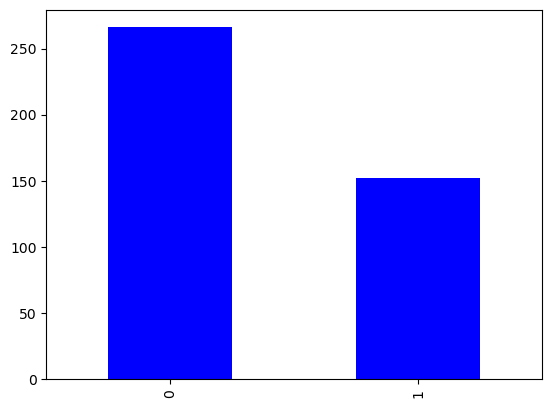

In [11]:
survival=df['Survived'].value_counts()
survival.plot(kind='bar',color='blue')

In [14]:
child=df[df['Age']<18]
cond1=child[(child['SibSp']!=0) | (child['Parch']!=0)]['Survived'].value_counts()
cond1[0]

18

<Axes: xlabel='Pclass,Survived'>

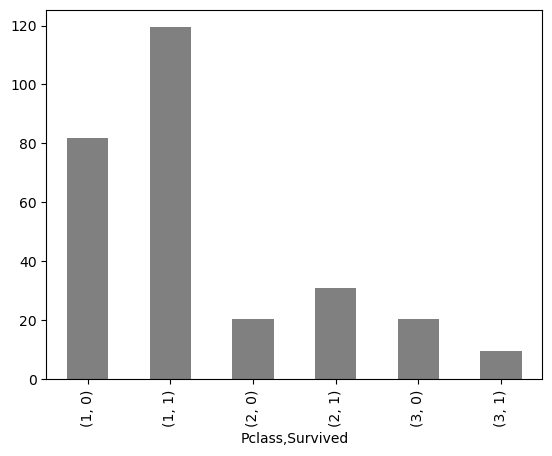

In [15]:
senior=df[df['Age']>=40]
senior.groupby(['Pclass','Survived'])['Fare'].mean().plot(kind='bar',color='grey')

In [19]:
df[(df['SibSp']==0) & (df['Parch']==0)]['Survived'].value_counts()

0    185
1     68
Name: Survived, dtype: int64

In [20]:
df[(df['SibSp']==0) & (df['Parch']==0) & (df['Survived']==1)]['Survived'].value_counts()

1    68
Name: Survived, dtype: int64

<Axes: xlabel='Survived'>

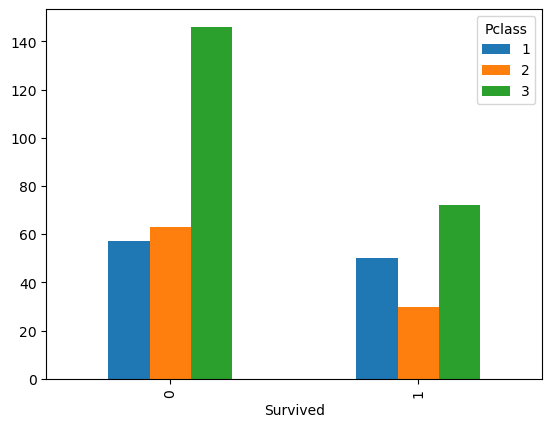

In [21]:
pd.crosstab(df.Survived,df.Pclass).plot(kind='bar')

<Axes: xlabel='Survived'>

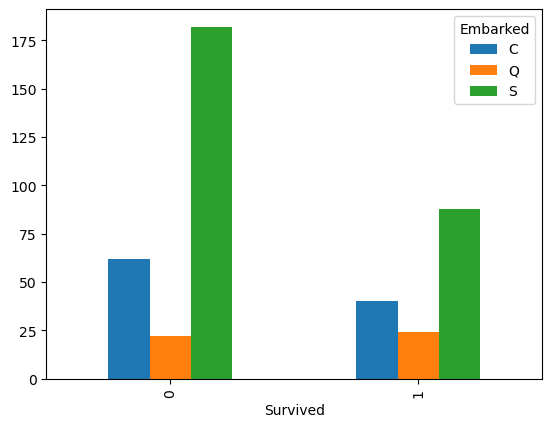

In [22]:
pd.crosstab(df.Survived,df.Embarked).plot(kind='bar')

<Axes: xlabel='Survived', ylabel='count'>

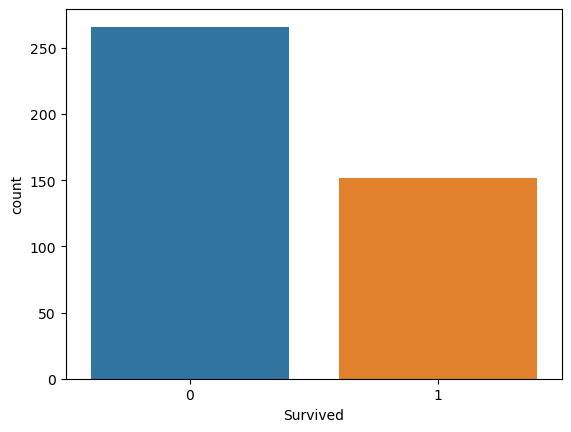

In [24]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

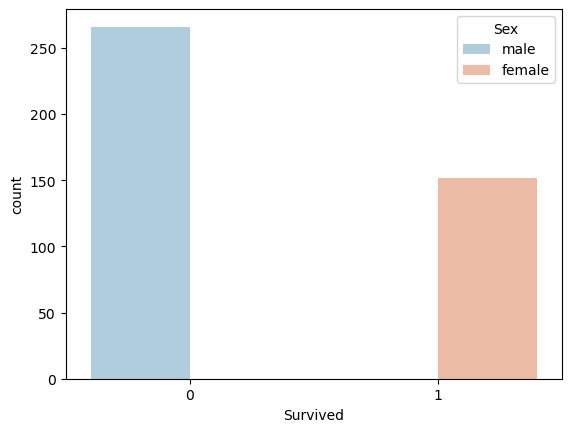

In [25]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

<Axes: >

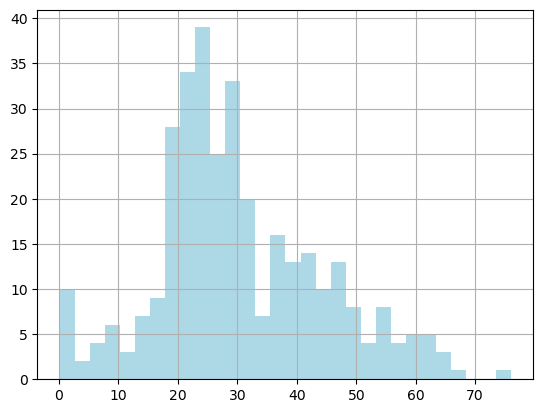

In [26]:
df['Age'].hist(bins=30,color='lightblue')

<Axes: >

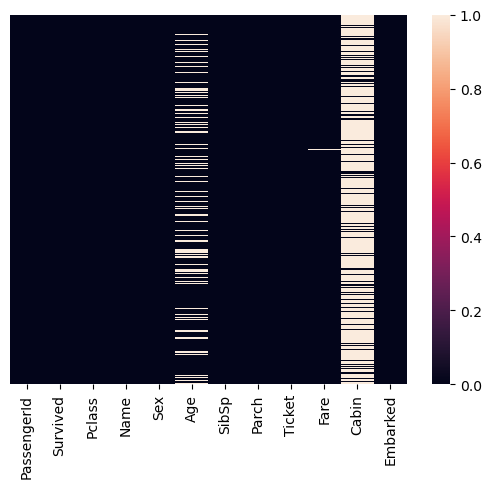

In [27]:
sns.heatmap(df.isnull(),yticklabels=False)

In [28]:
df['Age'].mean()

30.272590361445783

In [29]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

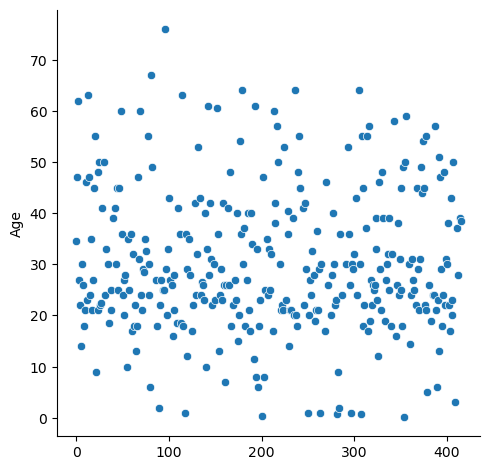

In [30]:
sns.relplot(df['Age'])
plt.show()

In [34]:
df[df['Embarked']=='Q']['Survived'].value_counts()

1    24
0    22
Name: Survived, dtype: int64

In [35]:
we=df[(df['Pclass']==1) & (df['Embarked']=='Q')]['Survived'].value_counts()
(we[1]/we.sum())*100

100.0

<Axes: xlabel='Survived'>

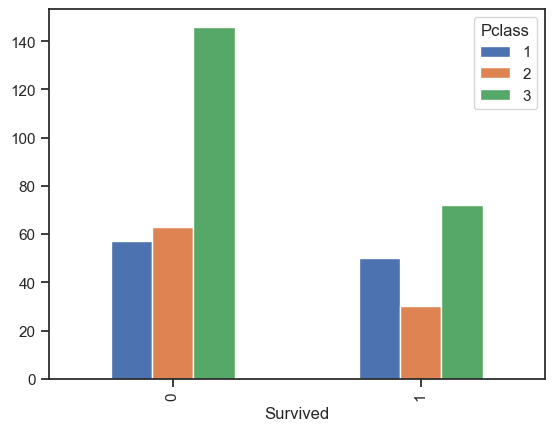

In [36]:
pd.crosstab(df.Survived,df.Pclass).plot(kind='bar')


Sex
female    1.0
male      0.0
Name: Survived, dtype: float64

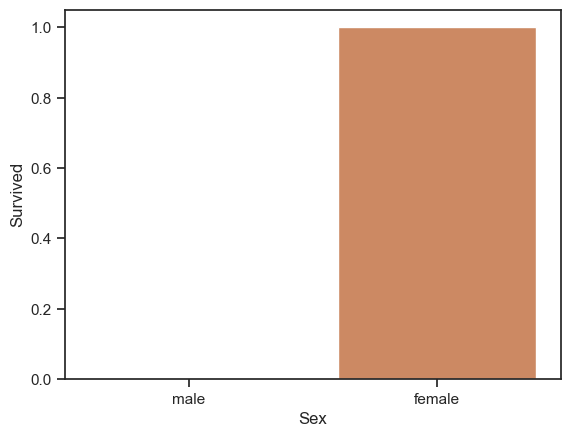

In [40]:
sns.barplot(x='Sex',y='Survived',data=df)
df.groupby('Sex',as_index=True).Survived.mean()

,Sex,Survived
0,female,1.0
1,male,0.0


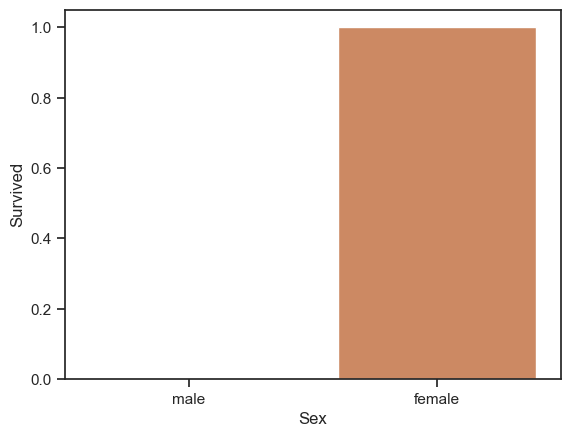

In [41]:
sns.barplot(x='Sex',y='Survived',data=df)
df.groupby('Sex',as_index=False).Survived.mean()

,Pclass,Survived
0,1,0.467290
2,3,0.330275
1,2,0.322581


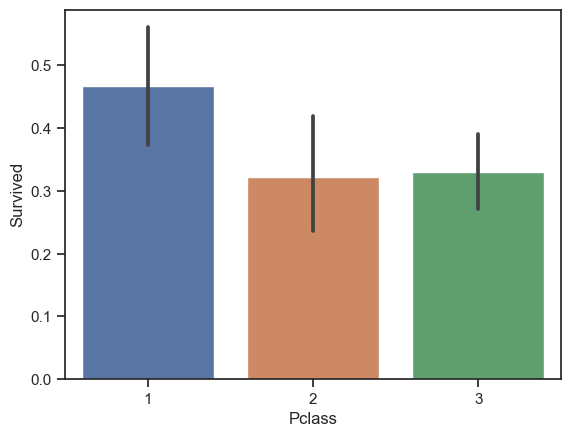

In [42]:
sns.barplot(x='Pclass',y='Survived',data=df)
df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [44]:
df['Sex'] = df.Sex.apply(lambda x: 0 if x == "female" else 1)
df['Sex'] = df.Sex.apply(lambda x: 0 if x == "female" else 1)

In [45]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


,Parch,Survived
4,4,1.000000
3,3,0.666667
2,2,0.606061
1,1,0.538462
7,9,0.500000
0,0,0.305556
5,5,0.000000
6,6,0.000000


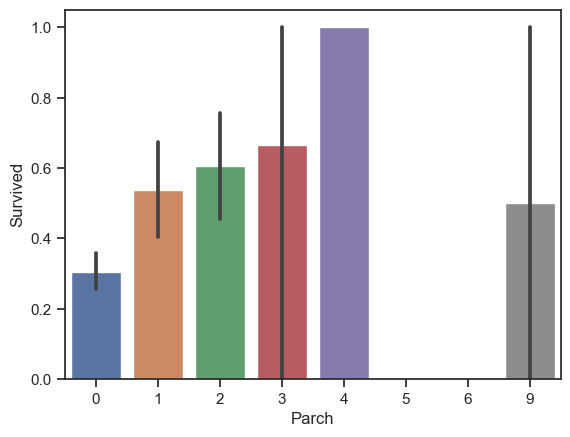

In [49]:
sns.barplot(x='Parch',y='Survived',data=df)
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
5,5,1.000000
6,8,0.500000
1,1,0.490909
2,2,0.428571
0,0,0.310954
3,3,0.250000
4,4,0.250000


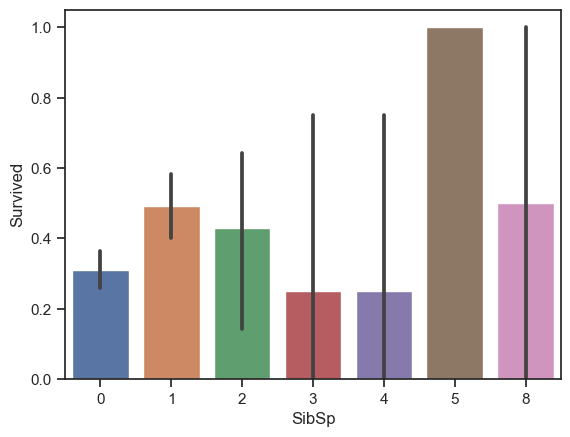

In [50]:
sns.barplot(x='SibSp',y='Survived',data=df)
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

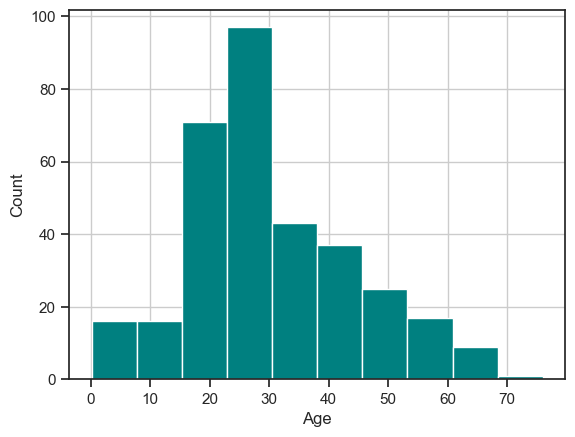

The Median age of passengers is : 27
The Standard Deviation age of passengers is : 14


In [51]:
df.Age.hist(bins=10,color='teal')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("The Median age of passengers is :", int(df.Age.median()))
print("The Standard Deviation age of passengers is :", int(df.Age.std()))